# Case Study: Climbing the Empire State Building 

### 🏙️ Scenario

You're walking up the Empire State Building with a friend and playing a dice game to determine your steps. 

**Rules**:**

- 🎲 Roll a die **100 times**.
- If you roll:
  - **1 or 2** → Step **down** 1 floor (but never below 0).
  - **3, 4, or 5** → Step **up** 1 floor.
  - **6** → Roll again and step **up** that number of steps.
- On each move, there's a *0.1% chance* of falling
  - If a fall happens -> you return to **step 0** 



🎯 **Goal**: Reach **60 steps or higher**.

**Key Question**: What’s the probability of reaching 60 steps or higher given the above constraints?

### 🔹 Strategy: How to Solve
**Options**
- Use complex probability theory and mathematical equations.

- Use **Hacker Statistics** - write a program to simulate the game 10,000 times and see how often we reach 60 steps. 

**Why Hacker Statistics** This approach utilizes computing power instead of calculus, and is ideal for complex systems & real-world data where equations/mathematical theory are hard to apply. 

### Random Number Generators 
- We'll use `numpy.random` to simulate dice rolls/randomness in the game. 
- These are pseudorandom numbers - look random but are generated from a starting point called a **seed**

### Setting Seed and Generating Random Numbers 

- `np.random.seed(n)`: Sets the random seed for reproducibility, where n is an integer you choose. Using the same seed produces the same random numbers every time. 


- `np.random.rand()`: Generates a random float between 0 and 1.


In [ ]:
import numpy as np
# Generate a pseudorandom number (different each run if seed not set)
print("Random number without setting seed:", np.random.rand()) 

In [ ]:
# Set a seed for reproducibility and generate random numbers 
import numpy as np
np.random.seed(123)  # Set seed for reproducibility
print(np.random.rand()) # Prints the first random number for this seed. 
print(np.random.rand())     # Prints the second random number for this seed. 

0.6964691855978616
0.28613933495037946


In [43]:
# Roll the Dice 
#Use randint()to simulate a dice and randomly generate the integer 1, 2, 3, 4, 5 or 6.
import numpy as np 
np.random.seed(123)

#Use randint() to simulate dice roll
print(np.random.randint(1,7))

#Use randint() again to simulate second throw of dice 
print(np.random.randint(1,7))

6
3


In [ ]:
#Determine Next Move 
# The next move depends on what number you get after throwing the dice. Assume player is already at Step 50 
import numpy as np 
np.random.seed(123)

step = 50 #Starting floor 

#Roll the Dice 
dice = np.random.randint(1,7)

#Apply dice rules using control flow  
if dice <= 2 : 
    step = step - 1 #Step down one floor 
elif dice in [3, 4, 5] : 
    step = step + 1 #Step up one floor 
else : 
    step = step + np.random.randint(1,7) #Roll again and step up that many floors. 
#Output the result
print(dice)
print(step)

#Output Explanation: 
# - dice = 6, so the else block runs and a second dice roll occurs.
# - Suppose the second roll is 3 → you move up 3 floors from your current step.
# - New step = 50 + 3 = 53

6
53


### Random Walk Concept

A **random walk** is a sequence of random steps where each new step depends on the previous one. 


Previously we simulated taking a single random step. Next, we will simulate *100* dice rolls/steps, updating our current position after each roll, to model the complete random walk.

### How to Simulate a Random Walk in Python (Dice Game Context)

- Use a **for loop** to simulate rolling the dice multiple times (e.g., 100 steps). 
- After each roll, update the current position by following the dice rules (control flow). 
    - Example: If current position = 50 and you roll a 3, you move up 1 floor to 51.  
- Use the **append()** method to add the new position (51) to the list. 
- The new position is added to the list and the loop continues... using it (51) as the current position.   
- The list tracks your updated position after each dice roll - simulating the complete random walk. 

**Summary:** 
- The `for loop` controls how many times you run the code (e.g., 100)
- The `append()` method inside the loop creates and updates the list for each dice roll. 


In [ ]:
#Simulate Random Walk 

import numpy as np 
np.random.seed(123)

#Initalize random_walk at position 0 

random_walk =[0]

#for loop -  on each iteration, set "step" = to the last item in the random_walk list (by using index [-1])

for x in range(100) : 
    step = random_walk[-1]
    dice = np.random.randint(1,7) #roll the dice 

    #Determine your next step 
    if dice <= 2 : 
        step = max(0, step-1) #use max to make sure dice doesnt go < 0. 
        #max returns the largest of the two arguments - ensuring step does not < 0 when decreasing it. 
    elif dice <= 5 : 
        step = step + 1 
    else: 
        step = step + np.random.randint(1,7) #roll again and take increase "step" by that amount. 
    
    random_walk.append(step) #append the new value of "step" to the random_walk list 

print(random_walk)
 

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


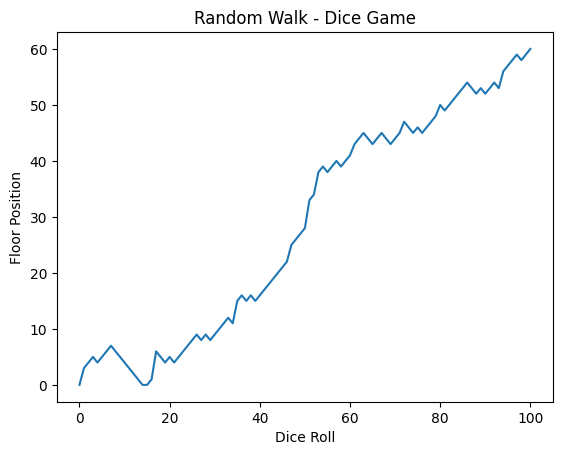

In [10]:
#Visualize Random Walk using matplotlib
import matplotlib.pyplot as plt 

plt.plot(random_walk)
plt.title ("Random Walk - Dice Game")
plt.xlabel("Dice Roll")
plt.ylabel("Floor Position")
plt.show()